In [132]:
import numpy as np
import  matplotlib.pyplot as plt

In [133]:
# Load all data
τ1_cneg = np.loadtxt("0.100000_1.300000_-0.500000_samples.dat")
τ2_cneg = np.loadtxt("0.100000_1.300000_-0.500000_samples2.dat")


τ1_cpos = np.loadtxt("0.100000_1.300000_0.500000_samples.dat")
τ2_cpos = np.loadtxt("0.100000_1.300000_0.500000_samples2.dat")

In [134]:
τ1_cneg[:10]

array([0.30799788, 0.50283041, 0.23172999, 0.14542217, 0.77437074,
       0.62437468, 0.60507431, 0.5444784 , 0.12597362, 0.35700351])

In [135]:
τ2_cneg[:10]

array([0.45546793, 1.15297681, 1.14893493, 1.01889111, 0.97358933,
       0.68431469, 0.73826932, 0.98608412, 1.08792101, 0.38827824])

### $\tau_1$ & $\tau_2$ sampling for $c<0$

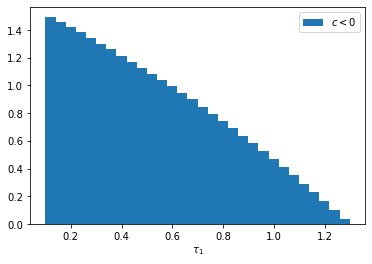

In [136]:
plt.hist(τ1_cneg, density=True, bins=30,label=r'$c<0$');  # density=False would make counts
plt.xlabel(r'$\tau_1$');
plt.legend();

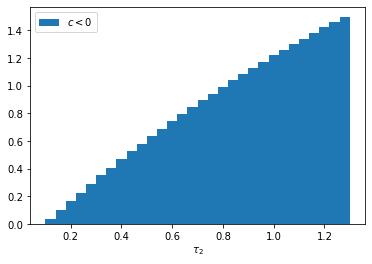

In [137]:
plt.hist(τ2_cneg, density=True, bins=30,label=r'$c<0$');  # density=False would make counts
plt.xlabel(r'$\tau_2$');
plt.legend();

### $\tau_1$ & $\tau_2$ sampling for $c>0$

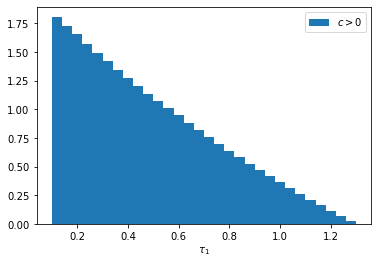

In [138]:
plt.hist(τ1_cpos, density=True, bins=30,label=r'$c>0$');  # density=False would make counts
plt.xlabel(r'$\tau_1$');
plt.legend();

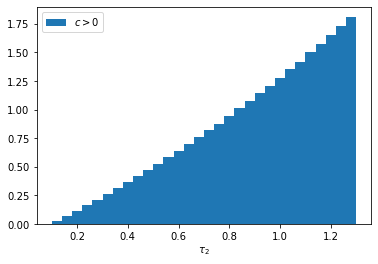

In [139]:
plt.hist(τ2_cpos, density=True, bins=30,label=r'$c>0$');  # density=False would make counts
plt.xlabel(r'$\tau_2$');
plt.legend();

### $\tau_1 | \tau_2$ heatmap

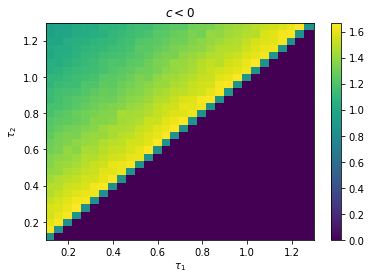

In [140]:
plt.hist2d(τ1_cneg,τ2_cneg,density=True,bins=30)
plt.colorbar()
plt.xlabel(r"$\tau_1$")
plt.ylabel(r"$\tau_2$");
plt.title(r"$c<0$");
plt.savefig("0.100000_1.300000_-0.500000_sampled.pdf",dpi=400)

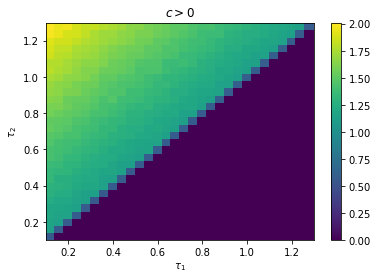

In [141]:
plt.hist2d(τ1_cpos,τ2_cpos,density=True,bins=30)
plt.colorbar()
plt.xlabel(r"$\tau_1$")
plt.ylabel(r"$\tau_2$");
plt.title(r"$c>0$");
plt.savefig("0.100000_1.300000_0.500000_sampled.pdf",dpi=400)

In [142]:
def _W(τ1,τ2,a,b,c):
    Z = (np.exp(c*(b-a))+a*c-b*c-1)/c**2
    if (τ2<τ1): 
        return 0
    else:
        return np.exp(c*(τ2-τ1))/Z

# Vectorize function so it's "numpy aware"
W = np.vectorize(_W)

### Compute exact 2D Distribution

In [143]:
# Set a,b,c (should match file name)
a = 0.1
b = 1.3
c = 0.5

_τ1,_τ2 = np.linspace(a,b,30),np.linspace(a,b,30)

# Create meshgrid
τ1,τ2 = np.meshgrid(_τ1,_τ2)

In [144]:
W_cneg = W(τ1,τ2,a,b,-c);

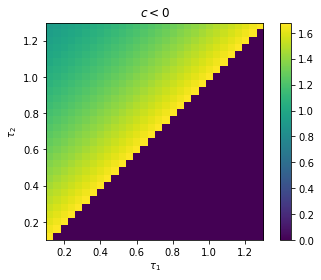

In [145]:
# Plot
plt.imshow(W_cneg,origin='lower',extent=[a,b,a,b]);
plt.xlabel(r'$\tau_1$')
plt.ylabel(r'$\tau_2$')
plt.colorbar();
plt.title(r'$c<0$');
plt.savefig("0.100000_1.300000_0.-500000_exact.pdf",dpi=400)

In [146]:
W_cpos = W(τ1,τ2,a,b,c);

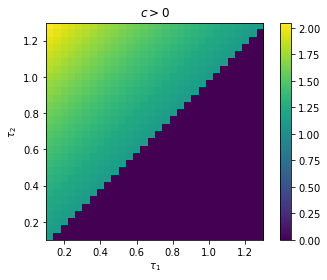

In [147]:
# Plot
plt.imshow(W_cpos,origin='lower',extent=[a,b,a,b]);
plt.xlabel(r'$\tau_1$')
plt.ylabel(r'$\tau_2$')
plt.colorbar();
plt.title(r'$c>0$');
plt.savefig("0.100000_1.300000_0.500000_exact.pdf",dpi=400)

### Compute relative errors

In [148]:
W_cneg.shape

(30, 30)

In [158]:
x_bins = np.linspace(a,b,31)
y_bins = np.linspace(a,b,31)
H = np.histogram2d(τ1_cneg, τ2_cneg, bins=(x_bins, y_bins),density=True)
H_cneg = H[0].T

<ipython-input-159-3a1bc486b6e9>:3: RuntimeWarning: invalid value encountered in true_divide
  relErr_cneg = np.nan_to_num((W_cneg-H_cneg)/W_cneg);


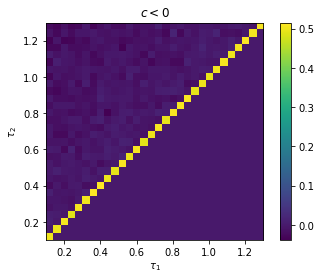

In [159]:
# Plot
# relErr_cneg = np.nan_to_num(np.abs(W_cneg-H_cneg)/W_cneg);
relErr_cneg = np.nan_to_num((W_cneg-H_cneg)/W_cneg);
plt.imshow(relErr_cneg,origin='lower',extent=[a,b,a,b]);
plt.xlabel(r'$\tau_1$')
plt.ylabel(r'$\tau_2$')
plt.colorbar();
plt.title(r'$c<0$');
plt.savefig("0.100000_1.300000_-0.500000_relativeError.pdf",dpi=400)

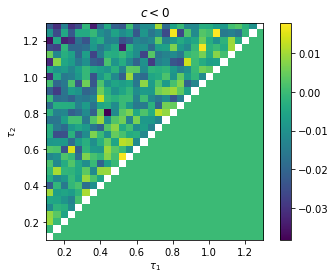

In [160]:
relErr_cneg = np.ma.masked_array(relErr_cneg,mask=relErr_cneg==np.diag(relErr_cneg))
plt.imshow(relErr_cneg,origin='lower',extent=[a,b,a,b]);
plt.xlabel(r'$\tau_1$')
plt.ylabel(r'$\tau_2$')
plt.colorbar();
plt.title(r'$c<0$');
plt.savefig("0.100000_1.300000_-0.500000_relativeError_masked_noAbs.pdf",dpi=400)

In [161]:
x = np.array([1,1,1])
y = np.array([1,1,0])
x == y

array([ True,  True, False])

Now for $c>0$

In [162]:
H = np.histogram2d(τ1_cpos, τ2_cpos, bins=(x_bins, y_bins),density=True)
H_cpos = H[0].T

<ipython-input-163-72e044c57602>:2: RuntimeWarning: invalid value encountered in true_divide
  relErr_cpos = np.nan_to_num((W_cpos-H_cpos)/W_cpos)


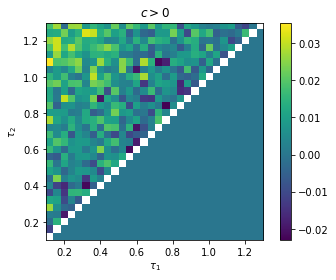

In [163]:
# Plot
relErr_cpos = np.nan_to_num((W_cpos-H_cpos)/W_cpos)
relErr_cpos = np.ma.masked_array(relErr_cpos,mask=relErr_cpos==np.diag(relErr_cpos))
plt.imshow(relErr_cpos,origin='lower',extent=[a,b,a,b]);
plt.xlabel(r'$\tau_1$')
plt.ylabel(r'$\tau_2$')
plt.colorbar();
plt.title(r'$c>0$');
plt.savefig("0.100000_1.300000_0.500000_relativeError_masked_noAbs.pdf",dpi=400)